# Fully-automated datawrangle, hypercube and Thematic PCA modules

You can run these codes by cloning GeoDS from DevOz branch until next master branch update as below.

git clone -b DevOz https://github.com/GoldspotDiscoveries/GeoDS

In [2]:
from GeoDS import eda
from GeoDS import hypercube
from GeoDS import datawrangle
from GeoDS import utilities

import os
import glob
import matplotlib as plt
plt.rcParamsDefault["figure.figsize"] = [20., 20.]
plt.rcParams["figure.facecolor"] = 'white'
plt.rcParams["axes.facecolor"] = 'white'
plt.rcParams["savefig.facecolor"] = 'white'

import warnings
warnings.filterwarnings('ignore')

In [3]:
AOI = 'AOI_2022_Work/SailPond_AOI_20220719.shp'
crs = 'epsg:26721'
xRes = 20
yRes = 20
pixel_size = 20

# Random seed
random_state = 42

In [4]:
trial_name = 'Thematic_PCA_Template'

output_folder = os.path.join(trial_name, 'outputs/')
PCA_folder = os.path.join(trial_name, 'PCA/')
    
if not os.path.exists(output_folder):
    os.makedirs(output_folder)   
    
if not os.path.exists(PCA_folder):
    os.makedirs(PCA_folder)

In [5]:
# GeoPhysics_Layers (ers to tif)

input_ers = 'Features/GeoPhysics_Layers/'
output_path = 'Features/GeoPhysics_Layers_tifs/'

for file in glob.glob(input_ers + '*.ers'):
    filename, ext, direct = utilities.Path_Info(file)
    output_name = output_path + filename + '.tif'
    utilities.ers_to_geotiff(input_ers=file, 
                             output_tif=output_name, 
                             dstCRS=crs, 
                             x_resolution=xRes, 
                             y_resolution=yRes, 
                             resampling_method='cubic')

Translate process done. See result in Features/GeoPhysics_Layers_tifs/RTP_regional.tif
Translate process done. See result in Features/GeoPhysics_Layers_tifs/ABI5M_RES.tif
Translate process done. See result in Features/GeoPhysics_Layers_tifs/ABI5M_CHG.tif
Translate process done. See result in Features/GeoPhysics_Layers_tifs/CHG_gnd.tif
Translate process done. See result in Features/GeoPhysics_Layers_tifs/RESmeasured_gnd.tif
Translate process done. See result in Features/GeoPhysics_Layers_tifs/GRVSurvey_CRESID_detrend.tif
Translate process done. See result in Features/GeoPhysics_Layers_tifs/GRVSurvey_DEM.tif
Translate process done. See result in Features/GeoPhysics_Layers_tifs/MF_gnd.tif
Translate process done. See result in Features/GeoPhysics_Layers_tifs/GRVSurvey_CRESID.tif


In [5]:
# I'm a data scientist! So I create random domain folders assuming that these are the domains 
# where the Thematic PCA should be applied and that these folders contain the required geotiffs.
# The folder names are assumed to be domain names in the current datawrangle.cube_vrt function.
# Therefore, my domain names in this example are as follows:

# Domain Names: GeoPhysics_Layers_tifs, topographic_stack_1m_lidar, byproducts

input_directories = ['Features/GeoPhysics_Layers_tifs/',
                     'Features/topographic_stack_1m_lidar/',          
                     'Features/topographic_stack_1m_lidar/byproducts/'   
                    ]

df_Input, columns = datawrangle.cube_vrt(input_directories, 
                     output_folder, 
                     xRes, 
                     yRes, 
                     crs, 
                     AOI, 
                     save_vrt=True, 
                     save_csv=False,
                     save_dask=True,
                     save_columns=True)

Converting vrt to dask dataframe... may take a while
Now writing columns in json
Your hypercube was saved under .vrt format (two files necessary) in the input data folder : Features 
Cube Creation Completed. 


In [6]:
df_Input # dask dataframe! To get the data, df_Input = df_Input.compute()

,y,x,RTP_regional,MF_gnd,RESmeasured_gnd,ABI5M_RES,GRVSurvey_DEM,CHG_gnd,GRVSurvey_CRESID,ABI5M_CHG,GRVSurvey_CRESID_detrend,slope_radians,prof_curv,plan_curv,aspect,total_curv,TWI_maxed30,smoothed_dem,oto_minus_original,TWI_maxed,oto_removed_dem,sterling_1m,dem_hydro_enforced,smooth__minus_oto,flow_accum_fd8
npartitions=1,,,,,,,,,,,,,,,,,,,,,,,,,
0,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
433779,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [7]:
columns # columns dictionary contains all domains and the corresponding geotiff files. 
# Also, columns dictionary includes a key called "features", which contains all the geotiffs in the given domains

{'coordinates': ['x', 'y'],
 'GeoPhysics_Layers_tifs': ['RTP_regional',
  'MF_gnd',
  'RESmeasured_gnd',
  'ABI5M_RES',
  'GRVSurvey_DEM',
  'CHG_gnd',
  'GRVSurvey_CRESID',
  'ABI5M_CHG',
  'GRVSurvey_CRESID_detrend'],
 'topographic_stack_1m_lidar': ['slope_radians',
  'prof_curv',
  'plan_curv',
  'aspect',
  'total_curv',
  'TWI_maxed30'],
 'byproducts': ['smoothed_dem',
  'oto_minus_original',
  'TWI_maxed',
  'oto_removed_dem',
  'sterling_1m',
  'dem_hydro_enforced',
  'smooth__minus_oto',
  'flow_accum_fd8'],
 'features': ['RTP_regional',
  'MF_gnd',
  'RESmeasured_gnd',
  'ABI5M_RES',
  'GRVSurvey_DEM',
  'CHG_gnd',
  'GRVSurvey_CRESID',
  'ABI5M_CHG',
  'GRVSurvey_CRESID_detrend',
  'slope_radians',
  'prof_curv',
  'plan_curv',
  'aspect',
  'total_curv',
  'TWI_maxed30',
  'smoothed_dem',
  'oto_minus_original',
  'TWI_maxed',
  'oto_removed_dem',
  'sterling_1m',
  'dem_hydro_enforced',
  'smooth__minus_oto',
  'flow_accum_fd8']}

In [6]:
# columns dictionary is also automatically saved as a JSON file in the given output_folder!
# Let's check the JSON file to see if its content is identical with the columns dictionary!

import json

# input_data can be the path to the multiple/partitioned dask dataframes.
# To read all partitions, hypercube name (_PATH_TO_THE_CUBE) must end with a '*' as shown below.
# In this case hypercube will read all csv files starting with "hypercube_08-16-2022_1843-"
_PATH_TO_THE_CUBE = os.path.join(output_folder,"hypercube_08-16-2022_1843-*.csv")

# Reading from file
_PATH_TO_THE_JSON = os.path.join(output_folder, "columns_08-16-2022_1843.json")
with open(_PATH_TO_THE_JSON) as file:
    json_data = json.loads(file.read())

json_data # Yeap! It has exactly the same content with the columns dictionary!
# Now we can use the outputs of datawrangle.cube_vrt in the hypercube class to generate the cube!

{'coordinates': ['x', 'y'],
 'GeoPhysics_Layers_tifs': ['RTP_regional',
  'MF_gnd',
  'RESmeasured_gnd',
  'ABI5M_RES',
  'GRVSurvey_DEM',
  'CHG_gnd',
  'GRVSurvey_CRESID',
  'ABI5M_CHG',
  'GRVSurvey_CRESID_detrend'],
 'topographic_stack_1m_lidar': ['slope_radians',
  'prof_curv',
  'plan_curv',
  'aspect',
  'total_curv',
  'TWI_maxed30'],
 'byproducts': ['smoothed_dem',
  'oto_minus_original',
  'TWI_maxed',
  'oto_removed_dem',
  'sterling_1m',
  'dem_hydro_enforced',
  'smooth__minus_oto',
  'flow_accum_fd8'],
 'features': ['RTP_regional',
  'MF_gnd',
  'RESmeasured_gnd',
  'ABI5M_RES',
  'GRVSurvey_DEM',
  'CHG_gnd',
  'GRVSurvey_CRESID',
  'ABI5M_CHG',
  'GRVSurvey_CRESID_detrend',
  'slope_radians',
  'prof_curv',
  'plan_curv',
  'aspect',
  'total_curv',
  'TWI_maxed30',
  'smoothed_dem',
  'oto_minus_original',
  'TWI_maxed',
  'oto_removed_dem',
  'sterling_1m',
  'dem_hydro_enforced',
  'smooth__minus_oto',
  'flow_accum_fd8']}

In [93]:
import pandas as pd
import dask.dataframe as dd
import os
import numpy as np
from GeoDS import utilities
import xarray
import json

class HyperCube:
    """
    Class with methods to clean, access and control data from a hypercube created by DataWrangler
    """

    def __init__(self, input_data, x_field, y_field, crs, columns_dict=None, **kwargs):
        """
        Constructs all the necessary attributes for the Hypercube object.
        Parameters
        ----------
        input_data : pandas dataframe or dask dataframe or str
            dataframe or file path to a csv file or a netcdf file
        x_field : str
            name of the x coordinate field
        y_field : str
            name of the y coordinate field
        z_field : str, OPTIONAL
            name of the z coordinate field
        crs : str
            coordinate system, example : EPSG:26921
        columns_dict : dict, optional
            dictionary of the columns
        """

        self.crs = crs
        if 'z_field' in kwargs:
            self.coordinates = [x_field, y_field, kwargs['z_field']]
        else:
            self.coordinates = [x_field, y_field]

        self.x = x_field
        self.y = y_field
        if 'z_field' in kwargs: self.z = kwargs['z_field']

        self.columns_dict = columns_dict    
        if (self.columns_dict != None):
            # If columns_dict is given by the user
            
            # If columns_dict is a dictionary
            if (type(self.columns_dict) == dict):
                cols_list = []
                for key, value in self.columns_dict.items():
                    cols_list.extend(value)
            
            # If columns_dict is the path to the json file
            elif (type(self.columns_dict) == str):
                file, extension, directory = utilities.Path_Info(self.columns_dict)
                if (extension == '.json'):
                    with open(self.columns_dict, 'r') as json_file:
                        json_data = json.load(json_file)
                        self.columns_dict = json_data # cube.columns_dict shows the content of json_data
                        cols_list = []
                        for key, value in json_data.items():
                            cols_list.extend(value)
                else:
                    print('columns_dict is only allowed to be in json format for now!')
                
            else:
                print('column_dict can be a dictionary or a json file, which is the output of datawrangle.cube_vrt')
            
        else:
            # If columns_dict is not given by the user
            cols_list = None

        if type(input_data) == str:
            file, extension, directory = utilities.Path_Info(input_data)
            if (extension == '.csv'):
                if file[-1] == '*':
                    # If filename ends with '*', which is an indication that there are multiple csv files with the same name,
                    # we read it with dask instead of pandas.
                    print("Using dask to read multiple csv files!")
                    self.df = dd.read_csv(input_data, usecols=cols_list)
                else:
                    # If it is a path for a single csv, we read it with pandas.
                    print("Using pandas to read the csv file!")
                    self.df = pd.read_csv(input_data, usecols=cols_list)
            elif (extension == '.nc'):
                xr = xarray.open_dataset(input_data)
                self.df = xr.to_dataframe().reset_index()

                no_coords = self.df.columns.values.tolist().copy()
                no_coords.remove(x_field)
                no_coords.remove(y_field)
                if 'z_field' in kwargs: no_coords.remove(kwargs['z_field'])

                self.df.dropna(axis=0, how='all', subset=no_coords, inplace=True)

            else:
                print('Error. We do not support the following format : ' + extension)

        elif type(input_data) == dd.core.DataFrame or type(input_data) == pd.core.frame.DataFrame:
            self.df = input_data.copy()

        return

    def set_as_categorical(self, subsets):
        for e in subsets:
            fields = self.columns_dict[e]
            for f in fields:
                self.df[f] = self.df[f].astype(str)
        return

    def replace_null(self, null_values, destination_null=np.nan):
        """
        Perform a df.replace on all the cube.
        Parameters
        ----------
        null_values : str, regex, list, dict, Series, int, float, or None
            values to replace (like df.replace)
        destination_null : scalar, dict, list, str, regex, default np.nan
            value argument of df.replace what you want to replace with. By default we use np.nan
        """
        self.df.replace(to_replace=null_values, value=destination_null, inplace=True)
        return

    def GetCatFeaturesIndexes(self, dataframe):
        """
        Get a list of indices of the columns with categorical features. Assumption is that you previously assigned a 'categories' key in the cube.
        Parameters
        ----------
        dataframe : pandas.DataFrame
            The input DataFrame. This function should be called on cube.getRowsWithLabelOnly() return.
        Returns
        -------
        list
            list of index
        """
        cat_col = self.columns_dict['categories']
        categorical_features_indices = [dataframe.columns.get_loc(c) for c in cat_col]
        return categorical_features_indices

    def CategoryToOriginalString(self, category_column, input_csv, key_column='0', value_column='Unnamed: 0',
                                 verbose=False):
        """
        Switch back the categories to their original strings. A geology raster processed through FeatureEngineer would be rasterized as 0, 1, 2,3, etc.
        You want have your cube containing Granite, Gabbro, Rhyolite, etc.. instead.
        FeatureEngineer will have saved a csv of the code correspondance. HyperCube.df attribute will be modified in-place.
        Parameters
        ----------
        category_column : str
            Name of the column in the cube you want to replace the values.
        input_csv : str
            Path to the code correspondance csv
        key_column : str
            key column name in the code correspondance csv
        value_column : str
            value column name in the code correspondance csv
        verbose : bool, default = False
            argument set to False by default. Set it to True if you want to have the correspondance printed out in the notebook/terminal.
        Returns
        -------
        None
        """
        correspondance = pd.read_csv(input_csv)
        corres = dict(zip(correspondance[key_column], correspondance[value_column]))

        self.df.replace({category_column: corres}, inplace=True)
        if (verbose == True):
            print(corres)
            print("Category Replaced")
        return None

    def apply_mask(self, mask_key):
        """
        Given you have a mask column in your cube (0 and 1), filters out data : 0 will be kept and 1 will be removed.
        Affects the df attribute inplace.
        Parameters
        ----------
        mask_key : str
            key of the column in your hypercube to use as the filter
        Returns
        -------
        None
            Affects the DataFrame inplace.
        """

        self.df[mask_key].fillna(0, inplace=True)
        self.df = self.df.loc[~self.df[mask_key].astype('bool'), :]
        return

    def subset(self, keys):
        """
        Function to get a portion of a dataframe based on the keys from columns_dict attribute.
        Parameters
        ----------
        keys : list
            keys of the column dictionary (columns_dict attribute) : example ['geophysics', 'categories']
        Returns
        -------
        pandas.DataFrame
            a DataFrame with only columns from the subsets asked.
        """

        # Could also call __subsetCols
        cols = []
        for k in keys:
            for i in self.columns_dict[k]:
                cols.append(i)

        return self.df.loc[:, cols]

    def __subsetCols(self, keys):
        """
        PRIVATE function to get only the columns names from given subset. Example, ['geophysics', 'categories'] would return ['TMI', '1st_VD', '2nd_VD', 'geologic_map', ...]
        Parameters
        ----------
        keys : list
            subsets (keys) to look for in the columns_dict attribute
        Returns
        -------
        list
            list of columns names from given subset
        """
        cols = []
        for k in keys:
            for i in self.columns_dict[k]:
                cols.append(i)
        return cols

    def to_object(self, columns):
        """
        Allows to convert one or many columns to dtype object (string). Lets say you have a layer of 1,2,3,4,5.. clusters from remote sensing. You want to have this column flagged as 'object' type so that
        columns transformers (and CatBoost) can recognize this.
        Parameters
        ----------
        columns : str, list
            name of the column, or list of many columns that needs to be converted
        Returns
        -------
        None
        """
        if (isinstance(columns, str)):
            self.df[columns] = self.df[columns].astype(str)
        if (isinstance(columns, list)):
            for c in columns:
                self.df[c] = self.df[c].astype(str)
        return None

    def summary(self):
        """
        Print df.info() summary from the cube's data and make sure all the columns are displayed.
        Returns
        -------
        None
        """
        cols = len(self.df.columns.values)
        # pd.set_option('display.max_columns', 160)
        return self.df.info(max_cols=cols, show_counts=True)

    def show_nan_percentage(self):
        """
        Show the percentage of Nan values
        """

        for column in self.df.columns:
            null_rate = self.df[column].isna().sum() / len(self.df) * 100
            if null_rate > 0:
                print("{}'s null rate :{}%".format(
                    column, round(null_rate, 5)))

    def dropna(self, subset, how="any", inplace=True):
        """
        Perform a DataFrame.dropna function on the columns of a given subset.
        Parameters
        ----------
        subset : str
            subset (geophysics, remote sensing, category... etc.)
        how :str, default='any'
            'any' or 'all' default is 'any'
        inplace : bool, default=True
            True or False
        Returns
        -------
        pandas.DataFrame or None
            DataFrame with NA entries dropped from it or None if inplace=True.
        """
        if (inplace == True):
            self.df.dropna(subset=self.columns_dict[subset], how=how, inplace=inplace)
            return None
        else:
            return self.df.dropna(subset=self.columns_dict[subset], how=how, inplace=inplace)

    def SetColumnsDict(self, columns):
        """
        Not all implemented yet.
        Parameters
        ----------
        columns :
        Returns
        -------
        """
        print("NOT IMPLEMENTED YET")
        existing_cols = self.df.columns.values.tolist()
        if type(columns) is dict:
            # Ensure that the given columns are in the dataframe
            for key in columns:
                for e in columns[key]:
                    if (e not in existing_cols):
                        print("Input column " + e + " is not in the input cube.")
                        return

            # if we are here, that means columns were correctly input.
            self.columns_dict = columns
        else:
            print("Input should be a dictionary.")
            return

    def getRowsWithLabelOnly(self, subsets, target, target_type='categorical'):
        """
        Get a X and y subset of the DataFrame with only rows that have a label in a certain target columm.
        Parameters
        ----------
        subsets : list
            the subsets you want included in the X data. (each one is a str type)
        target : str
            name of the target column you want for y
        Returns
        -------
        pandas.DataFrame
            X a DataFrame for training data that can be sent to to sklearn.test_train_split()
        pandas.DataFrame
            Y a DataFrame for training data that can be sent to to sklearn.test_train_split()
        """
        data = self.df.dropna(subset=[target], how='any')

        cols = self.__subsetCols(subsets)
        X = data.loc[:, cols]
        y = data.loc[:, target]

        # for i in target:
        if target_type == 'categorical': y = y.astype({target: 'int32'})
        if target_type == 'numerical': y = y.astype({target: 'float32'})
        # y = y.astype({target: 'int32'})
        # df.dropna(how=any, inplace=True)
        # df = df.astype({col: 'int32'})
        return X, y

    def domain_names(self):
        if self.columns_dict is not None:
            
            # Strings in the excluded_domains list are not considered as domain names.
            excluded_domains = ['coordinates',
                                'coordinates'.capitalize(),
                                'numerical', 
                                'numerical'.capitalize(),
                                'categories',
                                'categories'.capitalize(),
                                'features',
                                'features'.capitalize()
                                ]

            # Let's print the domain names by typing a few lines
            print('Domain Names: \n=============')
            for key in self.columns_dict.keys():
                if key not in excluded_domains:
                    print(key)
            
        if self.columns_dict is None:
            print('columns_dict is a None type object of the HyperCube class.')
            print('Set column_dict object to the path of the JSON file output of datawrangle.cube_vrt or set a column dictionary containing all domains.')
        

In [94]:
# Example #1: 
# input_data could be a dask dataframe! Do not forget the .compute()
# columns_dict could be a dictionary!

#cube = hypercube.HyperCube(input_data=df_Input.compute(), 
#                           x_field='x', 
#                           y_field='y',
#                           crs=crs,
#                           columns_dict=columns)
#cube.df.head()

###################################################################

# Example #2:
# In addition to the Example #1, columns_dict could be the path to the JSON file.

#cube = hypercube.HyperCube(input_data=df_Input.compute(), 
#                           x_field='x', 
#                           y_field='y',
#                           crs=crs,
#                           columns_dict=_PATH_TO_THE_JSON)
#cube.df.head()

###################################################################

# Example #3:
# input_data can be the path to the multiple/partitioned dask dataframes.
# To read all partitions, hypercube name (_PATH_TO_THE_CUBE) must end with a '*' as shown below.
# In this case hypercube will read all csv files starting with "hypercube_08-16-2022_1843-"

#cube = hypercube.HyperCube(input_data=_PATH_TO_THE_CUBE, 
#                           x_field='x', 
#                           y_field='y',
#                           crs=crs,
#                           columns_dict=columns)
#cube.df.head()

###################################################################

# Example #4:
# In addition to the Example #3, columns_dict could be the path to the JSON file.

cube = HyperCube(input_data=_PATH_TO_THE_CUBE, 
                           x_field='x', 
                           y_field='y',
                           crs=crs,
                           columns_dict=_PATH_TO_THE_JSON)
cube.df.head()

Using dask to read multiple csv files!


,y,x,RTP_regional,MF_gnd,RESmeasured_gnd,ABI5M_RES,GRVSurvey_DEM,CHG_gnd,GRVSurvey_CRESID,ABI5M_CHG,...,total_curv,TWI_maxed30,smoothed_dem,oto_minus_original,TWI_maxed,oto_removed_dem,sterling_1m,dem_hydro_enforced,smooth__minus_oto,flow_accum_fd8
0,5665410.0,572350.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1,5665410.0,572370.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
2,5665410.0,572390.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
3,5665410.0,572410.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
4,5665410.0,572430.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0


In [95]:
cube.domain_names()

Domain Names: 
GeoPhysics_Layers_tifs
topographic_stack_1m_lidar
byproducts


In [90]:
# Let's check the cube.columns_dict object and see that its content is identical with columns dictionary and the JSON file
cube.columns_dict

In [11]:
# The number of geotiffs for the domain: 'GeoPhysics_Layers_tifs'  

len(cube.columns_dict['GeoPhysics_Layers_tifs'])

9

In [12]:
# The number of geotiffs for the domain: 'topographic_stack_1m_lidar' 

len(cube.columns_dict['topographic_stack_1m_lidar'])

6

In [13]:
# The number of geotiffs for the domain: 'byproducts' 

len(cube.columns_dict['byproducts'])

8

In [14]:
# The number of geotiffs for the 'features' key, which is the summation of all three domains 9+6+8=23
# In other words, the structure of the columns dictionary (or the JSON file) is 'cooordinates', domains and
# the feature keys, which contains all the geotiffs names given in the domains. 

# What's the purpose of having a 'features' key?
# You can see all the features just by typing cube.columns_dict['features']
# Don't worry! pca_dataframe function is not going to include this 'features' key as a domain and apply Thematic PCA.
# Your cube.columns_dict can contains 'features', 'numerical', 'categories', 'Features', 'Numerical', 'Categories'. 
# The code is smart enough not to detect those keys as a domain.

len(cube.columns_dict['features'])

23

In [15]:
# Let's print the domain names
# In the next update, we will include a cube.domains object to get the domains in just one line.

# cube.domains () # Run this line to get the domain names in the next update! 

# For now, let's print the domain names by typing a few lines
excluded_domains = ['coordinates',
                    'coordinates'.capitalize(),
                    'numerical', 
                    'numerical'.capitalize(),
                    'categories',
                    'categories'.capitalize()
                    ]

print('Domain Names: \n=============')
for key in cube.columns_dict.keys():
    if key not in excluded_domains:
        print(key)

Domain Names: 
GeoPhysics_Layers_tifs
topographic_stack_1m_lidar
byproducts
features


# Introduction to Thematic PCA

## $\bullet$ Example 1

In [16]:
# Example #1: 
# By default, the explained variance is None, which means that there is not going to be automatic dimension reduction.
# df_pca output contains all PCA columns for all domains. The syntax for the column naming is PC_{number}_{domain_name}
# where number is an integer starting from 1 up to the number of geotiff files given in that domain.

# A new boolean, OPTIONAL object called 'thematic_pca' is introduced and its default value is set to True.
# Also, a columns object is introduced to get the domains. 
# The column object could be a dictionary of datawrangle output or columns dictionary given to the HyperCube class.
# OR the column object could be the path to the datacube columns in json format.
# The columns object is MANDATORY to perform thematic PCA. If the columns object is not assigned by the user, 
# the function automatically performs normal PCA even if thematic_pca is set to True.
# FYI, datawrangle.cube_vrt(..., save_columns=True) function saves a JSON format of the columns names used while building the cube.
# The columns object is also be allowed to be a JSON file, which is already given by datawrangle.cube_vrt(..., save_columns=True) function.

# In a nutshell, 
# pca_dataframe performs thematic PCA if thematic_pca = True (by default) and columns object is provided by the user.
# pca_dataframe still performs normal PCA for the given dataframe if the columns object is NOT provided by the user.

df_pca, thematic_pca_objects = eda.pca_dataframe(cube.df, 
              explained_variance=None,
              scaler='standard_scaler',
              random_state=42,
              coordinates_index=None, 
              output_folder=PCA_folder,
              thematic_pca=True,
              columns=_PATH_TO_THE_JSON)

Performing Thematic PCA for the domain of  GeoPhysics_Layers_tifs
The dimension is reduced from  9  to  9  with the expected variance of None
Performing Thematic PCA for the domain of  topographic_stack_1m_lidar
The dimension is reduced from  6  to  6  with the expected variance of None
Performing Thematic PCA for the domain of  byproducts
The dimension is reduced from  8  to  8  with the expected variance of None


In [17]:
# df_pca output contains all PCA columns for all domains. 
# The syntax for the column naming is PC_{number}_{domain_name}
# where number is an integer starting from 1 up to the number of geotiff files given in that domain.

df_pca

,PC1_GeoPhysics_Layers_tifs,PC2_GeoPhysics_Layers_tifs,PC3_GeoPhysics_Layers_tifs,PC4_GeoPhysics_Layers_tifs,PC5_GeoPhysics_Layers_tifs,PC6_GeoPhysics_Layers_tifs,PC7_GeoPhysics_Layers_tifs,PC8_GeoPhysics_Layers_tifs,PC9_GeoPhysics_Layers_tifs,PC1_topographic_stack_1m_lidar,...,PC5_topographic_stack_1m_lidar,PC6_topographic_stack_1m_lidar,PC1_byproducts,PC2_byproducts,PC3_byproducts,PC4_byproducts,PC5_byproducts,PC6_byproducts,PC7_byproducts,PC8_byproducts
0,-1.531702,0.107228,-0.344019,-0.010158,0.010144,-0.000667,0.000412,-0.000001,2.259585e-08,1.373816,...,0.000034,-2.009166e-08,-2.024491,0.007816,-0.011305,-0.000026,0.000001,-1.619403e-08,-3.786267e-11,4.177899e-11
1,-1.531702,0.107228,-0.344019,-0.010158,0.010144,-0.000667,0.000412,-0.000001,2.259700e-08,1.373816,...,0.000034,-2.008977e-08,-2.024491,0.007816,-0.011305,-0.000026,0.000001,-1.619724e-08,-3.780481e-11,3.610487e-11
2,-1.531702,0.107228,-0.344019,-0.010158,0.010144,-0.000667,0.000412,-0.000001,2.259534e-08,1.373816,...,0.000034,-2.008977e-08,-2.024491,0.007816,-0.011305,-0.000026,0.000001,-1.619725e-08,-3.779411e-11,3.609118e-11
3,-1.531702,0.107228,-0.344019,-0.010158,0.010144,-0.000667,0.000412,-0.000001,2.259561e-08,1.373816,...,0.000034,-2.008977e-08,-2.024491,0.007816,-0.011305,-0.000026,0.000001,-1.619723e-08,-3.780745e-11,3.610826e-11
4,-1.531702,0.107228,-0.344019,-0.010158,0.010144,-0.000667,0.000412,-0.000001,2.259451e-08,1.373816,...,0.000034,-2.008977e-08,-2.024491,0.007816,-0.011305,-0.000026,0.000001,-1.619723e-08,-3.780823e-11,3.610927e-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433775,-1.531702,0.107228,-0.344019,-0.010158,0.010144,-0.000667,0.000412,-0.000001,2.259581e-08,1.373816,...,0.000034,-2.008977e-08,-2.024491,0.007816,-0.011305,-0.000026,0.000001,-1.619723e-08,-3.780745e-11,3.610826e-11
433776,-1.531702,0.107228,-0.344019,-0.010158,0.010144,-0.000667,0.000412,-0.000001,2.259581e-08,1.373816,...,0.000034,-2.008977e-08,-2.024491,0.007816,-0.011305,-0.000026,0.000001,-1.619723e-08,-3.780744e-11,3.610822e-11
433777,-1.531702,0.107228,-0.344019,-0.010158,0.010144,-0.000667,0.000412,-0.000001,2.259581e-08,1.373816,...,0.000034,-2.008977e-08,-2.024491,0.007816,-0.011305,-0.000026,0.000001,-1.619723e-08,-3.780744e-11,3.610822e-11
433778,-1.531702,0.107228,-0.344019,-0.010158,0.010144,-0.000667,0.000412,-0.000001,2.259581e-08,1.373816,...,0.000034,-2.008977e-08,-2.024491,0.007816,-0.011305,-0.000026,0.000001,-1.619723e-08,-3.780744e-11,3.610822e-11


In [18]:
thematic_pca_objects

# thematic_pca_objects is dictionary which includes all the PCA methods for the given domains!
# As a next step, we can easily check the scree plot for each domain. Let's do it!

{'GeoPhysics_Layers_tifs': PCA(random_state=42),
 'topographic_stack_1m_lidar': PCA(random_state=42),
 'byproducts': PCA(random_state=42)}

(<Figure size 864x648 with 1 Axes>,
 <AxesSubplot:title={'center':'PCA Scree Plot'}, xlabel='Number of components', ylabel='Explained variance (%)'>)

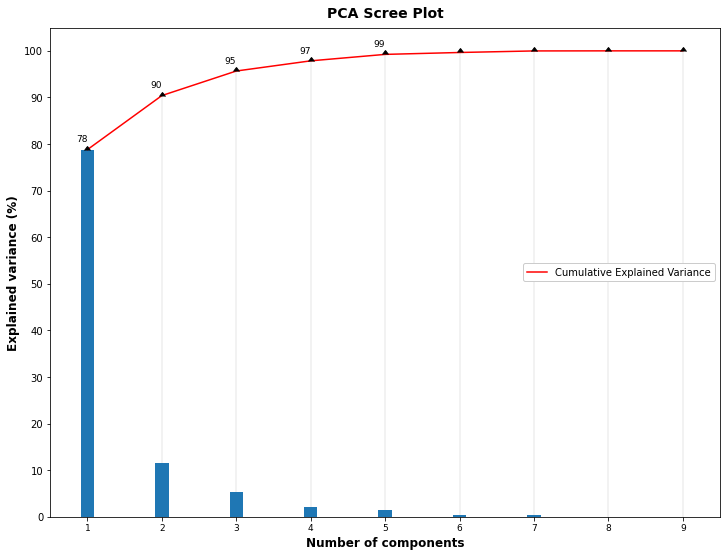

In [19]:
# Let's plot a scree plot for the domain: GeoPhysics_Layers_tifs

eda.scree_plot(thematic_pca_objects['GeoPhysics_Layers_tifs'], out_folder=PCA_folder)

(<Figure size 864x648 with 1 Axes>,
 <AxesSubplot:title={'center':'PCA Scree Plot'}, xlabel='Number of components', ylabel='Explained variance (%)'>)

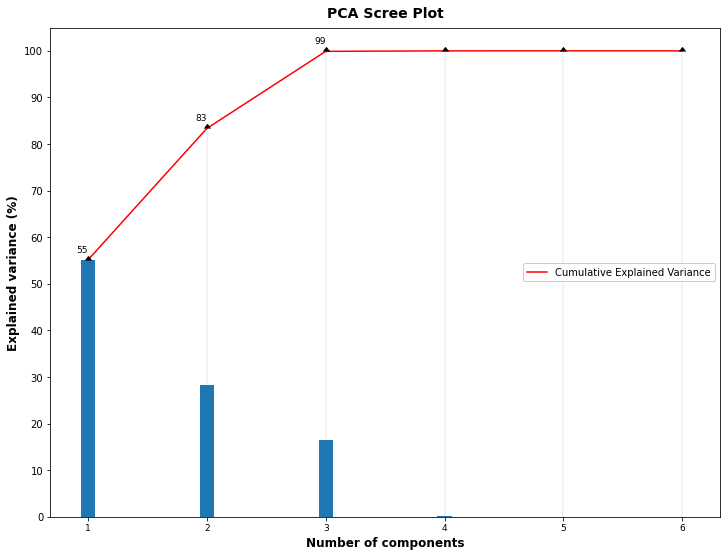

In [20]:
# Let's plot a scree plot for the domain: topographic_stack_1m_lidar

eda.scree_plot(thematic_pca_objects['topographic_stack_1m_lidar'], out_folder=PCA_folder)

(<Figure size 864x648 with 1 Axes>,
 <AxesSubplot:title={'center':'PCA Scree Plot'}, xlabel='Number of components', ylabel='Explained variance (%)'>)

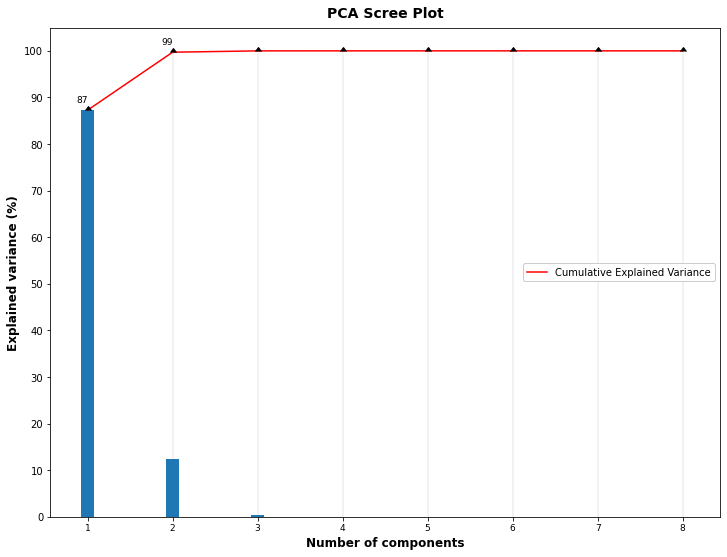

In [21]:
# Let's plot a scree plot for the domain: byproducts

eda.scree_plot(thematic_pca_objects['byproducts'], out_folder=PCA_folder)

## $\bullet$ Example 2

In [22]:
# Example #2:

# If the user wants an automatic dimension reduction using explained variance,
# explained variance can be set to any value between 0 and 1, preferably 0.99 (99% explained variance)

df_pca, thematic_pca_objects = eda.pca_dataframe(cube.df, 
              explained_variance=0.99,
              scaler='standard_scaler',
              random_state=42,
              coordinates_index=None, 
              output_folder=PCA_folder,
              thematic_pca=True,
              columns=_PATH_TO_THE_JSON)

Performing Thematic PCA for the domain of  GeoPhysics_Layers_tifs
The dimension is reduced from  9  to  5  with the expected variance of 0.99
Performing Thematic PCA for the domain of  topographic_stack_1m_lidar
The dimension is reduced from  6  to  3  with the expected variance of 0.99
Performing Thematic PCA for the domain of  byproducts
The dimension is reduced from  8  to  2  with the expected variance of 0.99


(<Figure size 864x648 with 1 Axes>,
 <AxesSubplot:title={'center':'PCA Scree Plot'}, xlabel='Number of components', ylabel='Explained variance (%)'>)

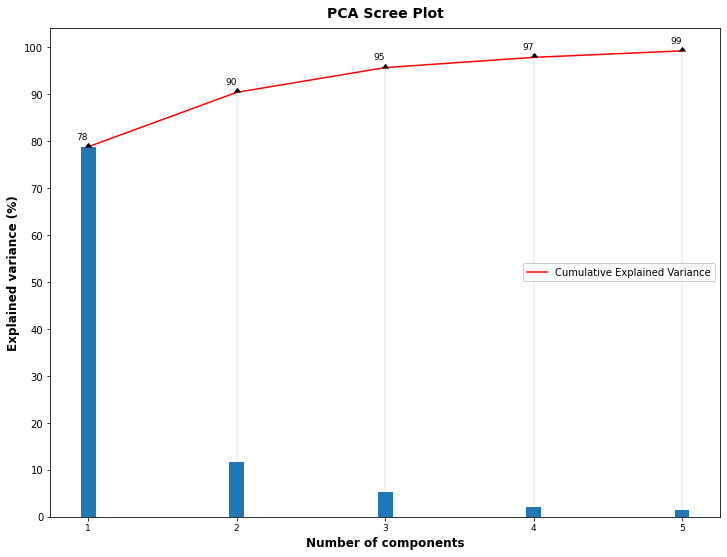

In [23]:
# Let's plot a scree plot for the domain: GeoPhysics_Layers_tifs

eda.scree_plot(thematic_pca_objects['GeoPhysics_Layers_tifs'], out_folder=PCA_folder)

(<Figure size 864x648 with 1 Axes>,
 <AxesSubplot:title={'center':'PCA Scree Plot'}, xlabel='Number of components', ylabel='Explained variance (%)'>)

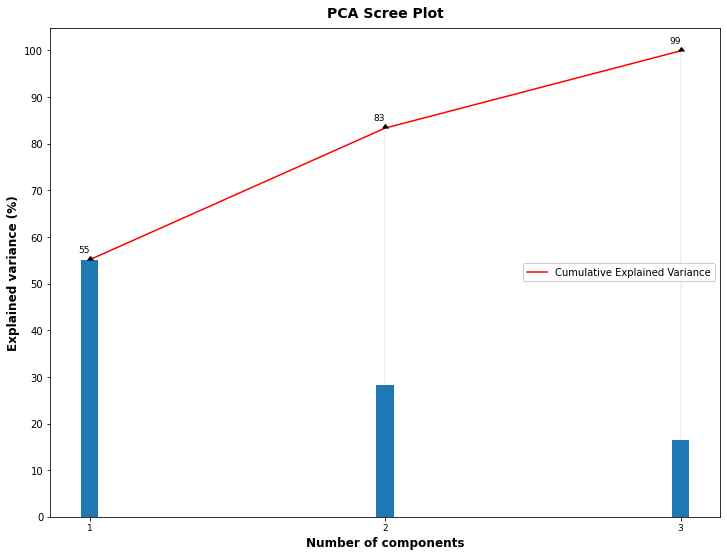

In [24]:
# Let's plot a scree plot for the domain: topographic_stack_1m_lidar

eda.scree_plot(thematic_pca_objects['topographic_stack_1m_lidar'], out_folder=PCA_folder)

## $\bullet$ Example 3

In [25]:
# Example #3:

# If the user wants an automatic dimension reduction by keeping any number of PC components,
# the user can set an integer value for explained variance!
# FYI,any integer value of explained variance corresponds to n_components object of PCA object.
# I know it sounds too complicated but it's not! 
# Let's keep only the first two components: explained_variance=2

df_pca, thematic_pca_objects = eda.pca_dataframe(cube.df, 
              explained_variance=2,
              scaler='standard_scaler',
              random_state=42,
              coordinates_index=None, 
              output_folder=PCA_folder,
              thematic_pca=True,
              columns=_PATH_TO_THE_JSON)

Performing Thematic PCA for the domain of  GeoPhysics_Layers_tifs
The dimension is reduced from  9  to  2  with the expected variance of 2
Performing Thematic PCA for the domain of  topographic_stack_1m_lidar
The dimension is reduced from  6  to  2  with the expected variance of 2
Performing Thematic PCA for the domain of  byproducts
The dimension is reduced from  8  to  2  with the expected variance of 2


(<Figure size 864x648 with 1 Axes>,
 <AxesSubplot:title={'center':'PCA Scree Plot'}, xlabel='Number of components', ylabel='Explained variance (%)'>)

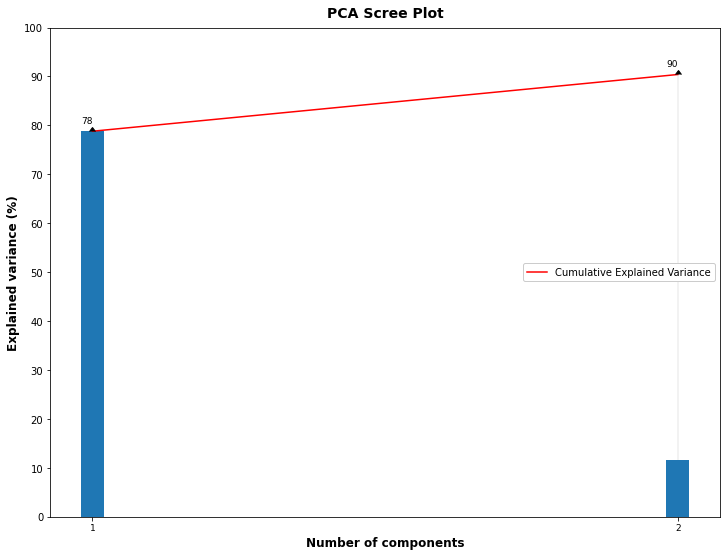

In [26]:
# Let's plot a scree plot for the domain: GeoPhysics_Layers_tifs

eda.scree_plot(thematic_pca_objects['GeoPhysics_Layers_tifs'], out_folder=PCA_folder)

(<Figure size 864x648 with 1 Axes>,
 <AxesSubplot:title={'center':'PCA Scree Plot'}, xlabel='Number of components', ylabel='Explained variance (%)'>)

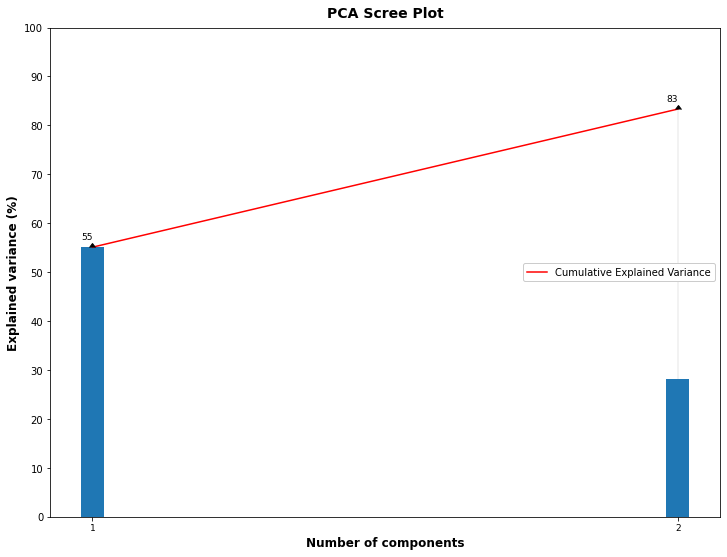

In [27]:
# Let's plot a scree plot for the domain: topographic_stack_1m_lidar

eda.scree_plot(thematic_pca_objects['topographic_stack_1m_lidar'], out_folder=PCA_folder)

## $\bullet$ Example 4

In [28]:
# Example #4:

# If the user wants to do a 'normal' PCA rather than a Thematic PCA, Voila!
# eda.pca_dataframe can still do it.
# All the user has to do is set thematic_pca flag as False and that's it!

# Extra info: If the user do not provide a columns object, eda.pca_dataframe still do 'normal PCA', 
# which will be discussed in Example #5

df_pca, thematic_pca_objects = eda.pca_dataframe(cube.df, 
              explained_variance=None,
              scaler='standard_scaler',
              random_state=42,
              coordinates_index=None, 
              output_folder=PCA_folder,
              thematic_pca=False,
              columns=_PATH_TO_THE_JSON)

The dimension is reduced from  23  to  23  with the expected variance of None


In [29]:
# How do we know that eda.pca_dataframe did a 'normal PCA'?
# Answer: Look at the column names (just PC1, PC2, PC3 etc instead of PC1_{domain_name})
# Also, 23 is the number of features in the provided datacube and JSON file.

df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
0,2.896823,0.316033,-0.042933,0.015706,0.008011,-0.001125,-0.000274,0.000363,0.000433,-0.01109,...,0.000018,-0.000021,0.000018,-0.000002,4.059543e-08,-1.868547e-08,2.366994e-10,1.748065e-09,7.836653e-10,-6.987022e-19
1,2.896823,0.316033,-0.042933,0.015706,0.008011,-0.001125,-0.000274,0.000363,0.000433,-0.01109,...,0.000018,-0.000021,0.000018,-0.000002,4.059770e-08,-1.868578e-08,2.295546e-10,1.747468e-09,7.829233e-10,-5.711362e-21
2,2.896823,0.316033,-0.042933,0.015706,0.008011,-0.001125,-0.000274,0.000363,0.000433,-0.01109,...,0.000018,-0.000021,0.000018,-0.000002,4.059772e-08,-1.868476e-08,2.295864e-10,1.747477e-09,7.829309e-10,6.716635e-21
3,2.896823,0.316033,-0.042933,0.015706,0.008011,-0.001125,-0.000274,0.000363,0.000433,-0.01109,...,0.000018,-0.000021,0.000018,-0.000002,4.059772e-08,-1.868510e-08,2.295865e-10,1.747473e-09,7.829218e-10,5.841116e-21
4,2.896823,0.316033,-0.042933,0.015706,0.008011,-0.001125,-0.000274,0.000363,0.000433,-0.01109,...,0.000018,-0.000021,0.000018,-0.000002,4.059772e-08,-1.868391e-08,2.296150e-10,1.747473e-09,7.829265e-10,4.326008e-21


## $\bullet$ Example 5

In [30]:
# Example #5:

# If the columns object is not provided by the user, 
# eda.pca dataframe still does 'normal PCA' regardless of thematic pca being set to True.
# For this reason, the only thing that allows the code to automatically switch from normal PCA to thematic PCA 
# is whether columns are provided by the user or not.

df_pca, thematic_pca_objects = eda.pca_dataframe(cube.df, 
              explained_variance=None,
              scaler='standard_scaler',
              random_state=42,
              coordinates_index=None, 
              output_folder=PCA_folder,
              thematic_pca=True)

The dimension is reduced from  23  to  23  with the expected variance of None


In [31]:
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
0,2.896823,0.316033,-0.042933,0.015706,0.008011,-0.001125,-0.000274,0.000363,0.000433,-0.01109,...,0.000018,-0.000021,0.000018,-0.000002,4.059543e-08,-1.868547e-08,2.366994e-10,1.748065e-09,7.836653e-10,-6.987022e-19
1,2.896823,0.316033,-0.042933,0.015706,0.008011,-0.001125,-0.000274,0.000363,0.000433,-0.01109,...,0.000018,-0.000021,0.000018,-0.000002,4.059770e-08,-1.868578e-08,2.295546e-10,1.747468e-09,7.829233e-10,-5.711362e-21
2,2.896823,0.316033,-0.042933,0.015706,0.008011,-0.001125,-0.000274,0.000363,0.000433,-0.01109,...,0.000018,-0.000021,0.000018,-0.000002,4.059772e-08,-1.868476e-08,2.295864e-10,1.747477e-09,7.829309e-10,6.716635e-21
3,2.896823,0.316033,-0.042933,0.015706,0.008011,-0.001125,-0.000274,0.000363,0.000433,-0.01109,...,0.000018,-0.000021,0.000018,-0.000002,4.059772e-08,-1.868510e-08,2.295865e-10,1.747473e-09,7.829218e-10,5.841116e-21
4,2.896823,0.316033,-0.042933,0.015706,0.008011,-0.001125,-0.000274,0.000363,0.000433,-0.01109,...,0.000018,-0.000021,0.000018,-0.000002,4.059772e-08,-1.868391e-08,2.296150e-10,1.747473e-09,7.829265e-10,4.326008e-21


# Happy thematic analysis :)